In [1]:
# import modules
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# read csv file
csv_path1 = os.path.join('raw_data','clinicaltrial_data.csv')
csv_path2 = os.path.join('raw_data','mouse_drug_data.csv')
# place csv data into a DataFrame
clinic_df = pd.read_csv(csv_path1)
mouse_drug_df = pd.read_csv(csv_path2)

In [3]:
# Merge Clinical and Drug Data
pharma_df = mouse_drug_df.merge(clinic_df)
# Filter Data as our objective is to analyze the data to show how four treatments 
# (Capomulin, Infubinol, Ketapril, and Placebo) and compare
pharma_slice_df = pharma_df.loc[(pharma_df['Drug'] == 'Capomulin') |  (pharma_df['Drug'] == 'Infubinol') |
                                (pharma_df['Drug'] == 'Ketapril') | (pharma_df['Drug'] == 'Placebo')]
pharma_slice_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


In [4]:
# Group Data based on Drug and Timepoint
tumor_vol_group = pharma_slice_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
tumor_vol_df = pd.DataFrame(tumor_vol_group)
tumor_vol_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
# Organize data
tumor_vol_df = tumor_vol_df.reset_index()
tumor_vol_df = tumor_vol_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_vol_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


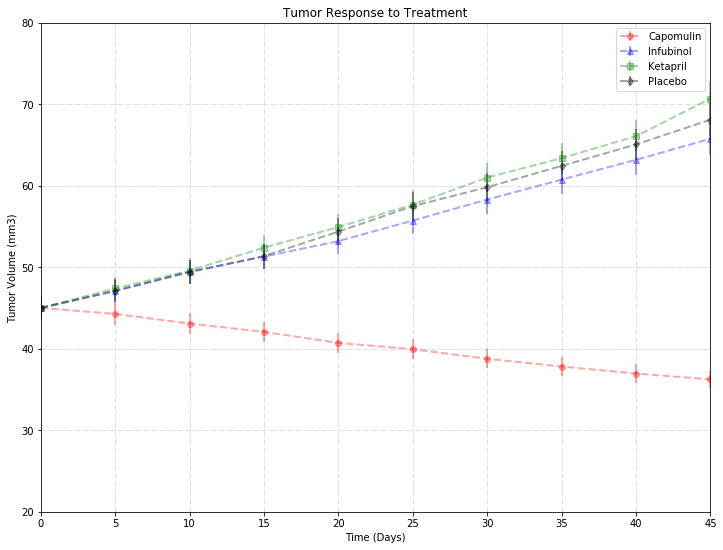

In [6]:
# 1. Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
# set plot size
fig = plt.figure(figsize=(12,9))
# set color, marker and list of drugs
colors = ["red","blue","green","black"]
marker = ['o','^','s','d']
drugs_list = tumor_vol_df.columns

# Plot graph for each drug
i=0
for drug in drugs_list:
    plt.errorbar(tumor_vol_df.index,tumor_vol_df[drug], yerr= 0.03 * tumor_vol_df[drug], ls='--', lw=2.0, alpha=0.35,
                 c=colors[i],label=drug, marker=marker[i])
    i += 1
    
# Set graph properties - title, label, legend and limits
plt.grid(True, ls='-.', alpha=0.5)
plt.xlim(0,45)
plt.ylim(20,80)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(loc="best")

# Save the figure
plt.savefig("Tumor_Response.png")

# Show Plot
plt.show()

In [7]:
# Group Data based on Drug and Timepoint
metastatic_group = pharma_slice_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
metastatic_df = pd.DataFrame(metastatic_group)
metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Organize Data
metastatic_df = metastatic_df.reset_index()
metastatic_df = metastatic_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
metastatic_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


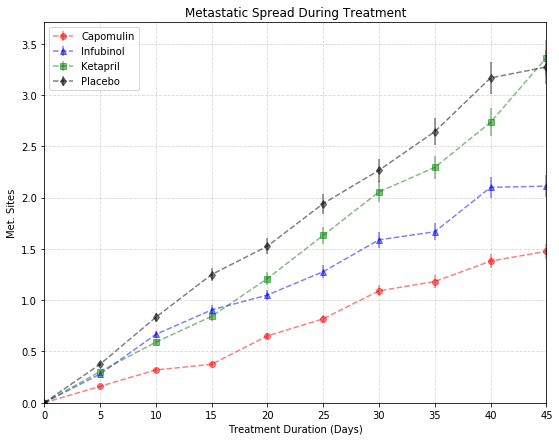

In [9]:
# Plot graph
fig = plt.figure(figsize=(9,7))
i=0
for drug in drugs_list:
    plt.errorbar(metastatic_df.index, metastatic_df[drug], yerr=0.05*metastatic_df[drug], alpha=0.5,
                 linestyle= '--', c=colors[i], label=drug, marker=marker[i])
    i += 1
    
# Set Graph Properties
plt.grid(True, ls='--', alpha=0.5) 
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.xlim(0,45)
plt.ylim(0)
plt.title("Metastatic Spread During Treatment")
plt.legend(loc="best")

# Save the figure
plt.savefig("Metastatic_Spread.png")

# Show Plot
plt.show()

In [10]:
# Calculate Mouse Survival Rate
survival_group = pharma_slice_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()
survival_rate_df = pd.DataFrame(survival_group)
survival_rate_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [11]:
# Organize Data
survival_rate_df = survival_rate_df.reset_index()
survival_rate_df = survival_rate_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
survival_rate_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


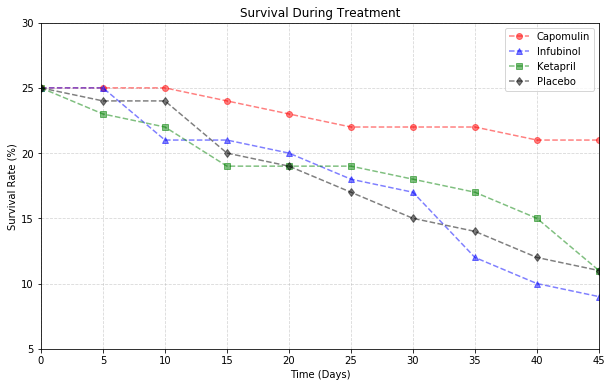

In [12]:
# Plot Graph
fig = plt.figure(figsize=(10,6))
i=0
for drug in drugs_list:
    plt.errorbar(survival_rate_df.index, survival_rate_df[drug], alpha=0.5,
                 linestyle= '--', c=colors[i], label=drug, marker=marker[i])
    i += 1

# Set Graph Properties
plt.xlim(0,45) 
plt.ylim(5,30)
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.grid(True, ls='--',alpha=0.5)
plt.legend(loc="best")

# Save the figure
plt.savefig("Survival_Rate.png")
# Show Plot
plt.show()

In [13]:
# Summary Bar Graph
# Calculate Percentage Change on Tumor Volume (mm3)
tumor_vol_pc_df = tumor_vol_df.pct_change().sum()*100
tumor_vol_pc_df.fillna(0)
tumor_vol_pc_df

Drug
Capomulin   -21.391539
Infubinol    38.746192
Ketapril     46.308083
Placebo      42.393592
dtype: float64

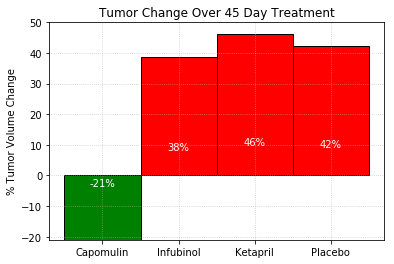

In [14]:
# Set values for X, Y axis and bar width
x = tumor_vol_pc_df.index
y = tumor_vol_pc_df
bar_width = 1
edgecolor = ['black','black','black','black']

# Set the color based on condition
colors = []
for value in y: # keys are the names of the boys
    if value > 0:
        colors.append('r')
    else:
        colors.append('g')
        
# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color=colors, ec=edgecolor, lw=1)

# Set Graph Properties
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment') 
plt.ylim(-21,50)
plt.grid(True,linestyle=':', alpha=0.7)

# Set the bar value inside each bar
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., .2*height,
                '%s' % (str(int(height)) + '%'),
                ha='center', va='bottom', color="white")
# Save the figure
plt.savefig("Summary_BarGraph.png")

# Show graph
plt.show()